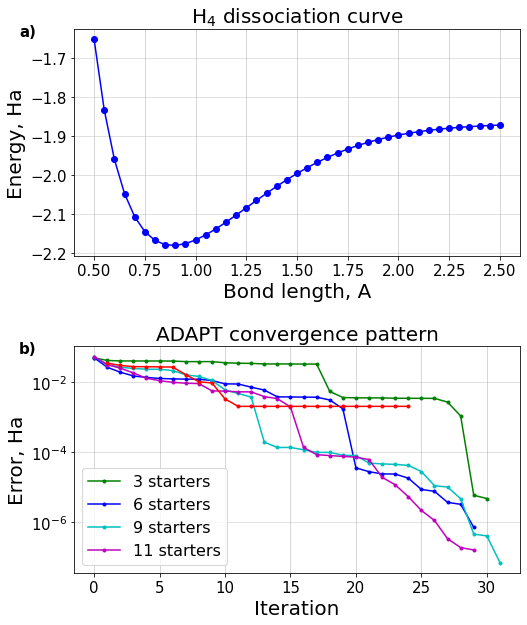

In [16]:
import matplotlib.pyplot as plt
import numpy as np

import pickle5 as pickle




fig, plots = plt.subplots(2, 1, figsize=(8,10))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)


plots[0].set_title('H$_4$ dissociation curve',fontsize=20)
plots[0].grid(axis='y', alpha=0.75)
plots[0].set_xlabel('Bond length, A',fontsize=20)
plots[0].set_ylabel('Energy, Ha',fontsize=20)


lengths=[]
energies=[]
dists=np.linspace(0.5,2.5,41)
for dist_num in range(len(dists)):
    dist=np.round(dists[dist_num],2)
    file = open("Bond_length_dependence.LiH_dissociation_curve_pickle_min_pool_{}".format(dist),'rb')
    myDict = pickle.load(file)[0]


    lengths.append(myDict['bond_length:'])
    energies.append(myDict['GSE:']+myDict['final_error:'])
    


plots[0].plot(lengths,energies,linestyle='-', marker='o', color='b')
plots[0].grid( linestyle = '-', linewidth = 0.5)


plots[1].set_title('ADAPT convergence pattern',fontsize=20)
plots[1].grid(axis='y', alpha=0.75)
plots[1].set_xlabel('Iteration',fontsize=20)
plots[1].set_ylabel('Error, Ha',fontsize=20)

plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

file_to_open= "3_starters.txt"
    

files_to_open= [("3_starters.txt", 'g', '3 starters'),
                ("6_starters.txt", 'b', '6 starters'),
                ("9_starters.txt", 'c', '9 starters'),
                ("11_starters.txt",'m', '11 starters')
               ]
    


for file_to_open, color, label in files_to_open:
    iteration=[]
    errors=[]
    file = open(file_to_open,'rb').readlines()
    for line_number in range(len(file)):
        line=file[line_number].decode("utf-8")
        if len(line)>45 and line[:45]=="                         ADAPT-VQE iteration:":
            if float(file[line_number+6].decode("utf-8")[7:])>0:

                iteration.append(int(line[47:]))
                error_line=file[line_number+6].decode("utf-8")
                errors.append(float(error_line[7:]))
    plots[1].plot(iteration,errors,linestyle='-', marker='.', color=color, label=label)

ercomp=[0.035575864713, 0.030505981688, 0.028276163984, 0.028065193138, 0.027794018841, 0.02739970865, 0.016697635995, 0.010369299012, 0.009616360694, 0.003351664697, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313, 0.002052778313]
it=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
plots[1].plot(it,ercomp,linestyle='-', marker='.', color='r')
plots[1].grid( linestyle = '-', linewidth = 0.5)
plots[1].set_yscale("log")
plots[1].legend(prop={'size': 16})


fig.text(0.03, 0.87, "a)", fontdict=None,fontsize=15,fontweight="bold")
fig.text(0.03, 0.43, "b)", fontdict=None,fontsize=15,fontweight="bold")

fig.savefig('H4_8_qubits.pdf',bbox_inches = 'tight',
    pad_inches = 0)  
plt.show()
